In [ ]:
from google.colab import drive
import pandas as pd

# Kết nối Google Drive
drive.mount('/content/drive')

# Định nghĩa đường dẫn tệp (CẬP NHẬT đường dẫn đúng theo thư mục trong Google Drive)
file_path = "/content/drive/My Drive/papers.csv"  # Cập nhật đường dẫn nếu cần

# Đọc file CSV
df = pd.read_csv(file_path)

# Hiển thị 5 dòng đầu tiên
df.head()


Mounted at /content/drive


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
papers = df.copy()  # Tạo bản sao từ df
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)  # Xóa các cột
papers.head()  # Hiển thị kết quả


,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
# load the regular expression library
import re# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
papers['paper_text_processed'].head()

,paper_text_processed
0,767\n\nself-organization of associative databa...
1,683\n\na mean field theory of layer iv of visu...
2,394\n\nstoring covariance by the associative\n...
3,bayesian query construction for neural\nnetwor...
4,neural network ensembles cross\nvalidation and...


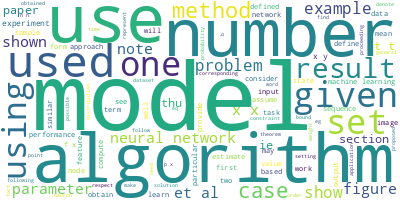

In [ ]:
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()


<ipython-input-8-7f44de9f5b79>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


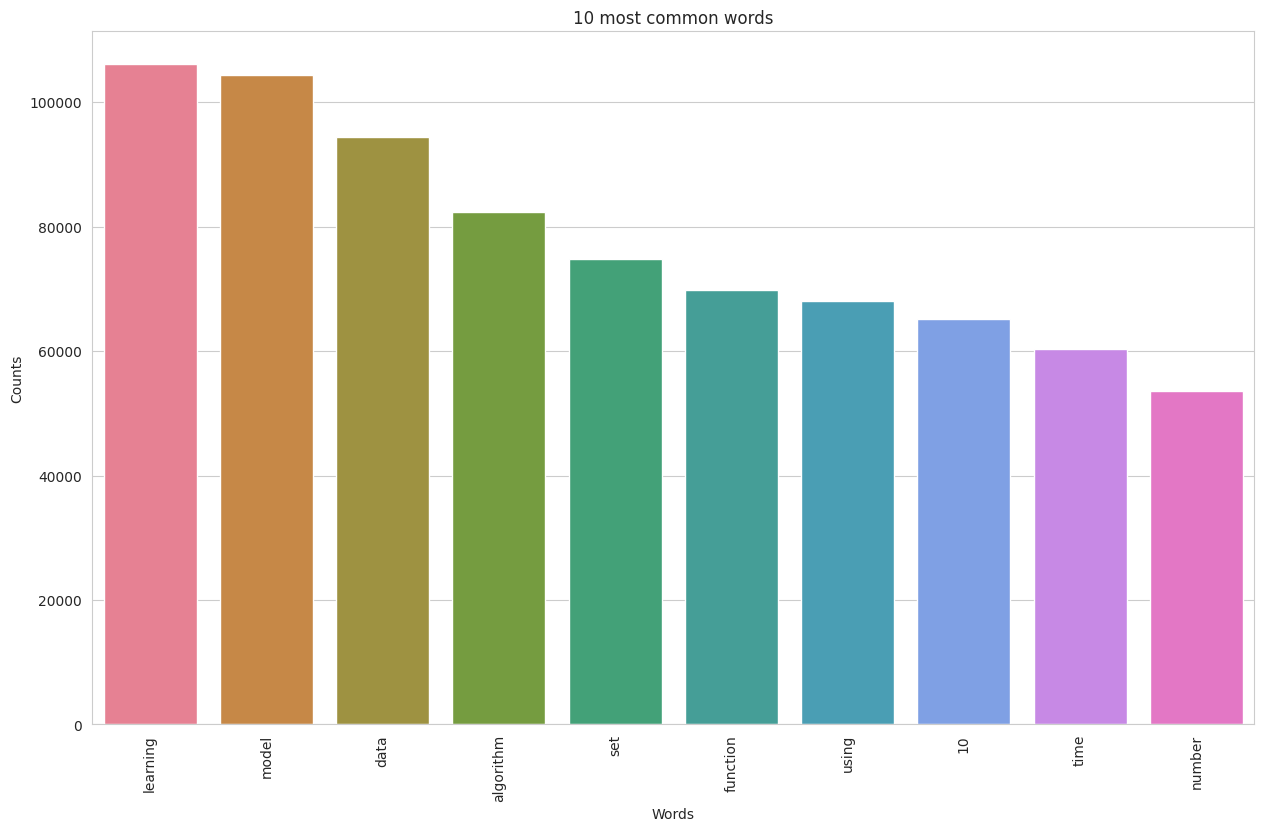

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()  # Đã sửa lỗi
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = sorted(zip(words, total_counts), key=lambda x: x[1], reverse=True)[:10]
    words, counts = zip(*count_dict)

    x_pos = np.arange(len(words))

    plt.figure(figsize=(15, 9))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()

# Khởi tạo CountVectorizer với stopwords tiếng Anh
count_vectorizer = CountVectorizer(stop_words='english')

# Fit và transform dữ liệu văn bản
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])

# Hiển thị 10 từ phổ biến nhất
plot_10_most_common_words(count_data, count_vectorizer)


In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load thư viện LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

# Helper function để in ra các chủ đề
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()  # Sửa lỗi tại đây
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tạo Vectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])

# Số lượng topics và từ khóa mỗi topic
number_topics = 5
number_words = 10

# Tạo và train mô hình LDA
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)

# In ra các chủ đề tìm được
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
time model neural neurons figure network input neuron spike information

Topic #1:
matrix data kernel 10 problem algorithm linear method xi sparse

Topic #2:
learning training model network image using neural networks data set

Topic #3:
model data distribution models log set using 10 inference algorithm

Topic #4:
algorithm learning function set problem algorithms optimal loss bound policy
